Aim of this program:
Implement a neural network to solve XOR Problem
Implement Backpropogation Algorithm to train a neural network
Illustrate the optimization of Weight and Bias using gradient descent

Import Required Libraries

In [1]:
# Importing the required library
import numpy as np
import matplotlib.pyplot as plt
# Reproducible results
np.random.seed(42)


Initialize Inputs: Define the input and expected output for a XOR network

In [2]:
X=np.array([[0,0],[0,1],[1,0],[1,1]]).T
d = np.array([[0, 1, 1, 0]])  

Declare the network parameters:
1. Number of input neurons
2. Hidden layer neurons
3. Output neurons
4. Learning Rate
5. Numebr of epochs

In [3]:
def initialize_network_parameters():
    # Network Parameters
    inputSize = 2  
    hiddenSize = 2 
    outputSize = 1 
    lr = 0.1
    epochs = 150000

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1  
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs


Epoch: 10000, Average error: 0.08356
Epoch: 20000, Average error: 0.03515
Epoch: 30000, Average error: 0.02548
Epoch: 40000, Average error: 0.02087
Epoch: 30000, Average error: 0.02548
Epoch: 40000, Average error: 0.02087
Epoch: 50000, Average error: 0.01807
Epoch: 60000, Average error: 0.01613
Epoch: 50000, Average error: 0.01807
Epoch: 60000, Average error: 0.01613
Epoch: 70000, Average error: 0.01470
Epoch: 80000, Average error: 0.01359
Epoch: 70000, Average error: 0.01470
Epoch: 80000, Average error: 0.01359
Epoch: 90000, Average error: 0.01269
Epoch: 100000, Average error: 0.01195
Epoch: 90000, Average error: 0.01269
Epoch: 100000, Average error: 0.01195
Epoch: 110000, Average error: 0.01132
Epoch: 120000, Average error: 0.01077
Epoch: 110000, Average error: 0.01132
Epoch: 120000, Average error: 0.01077
Epoch: 130000, Average error: 0.01030
Epoch: 140000, Average error: 0.00989
Epoch: 130000, Average error: 0.01030
Epoch: 140000, Average error: 0.00989
Epoch: 150000, Average error

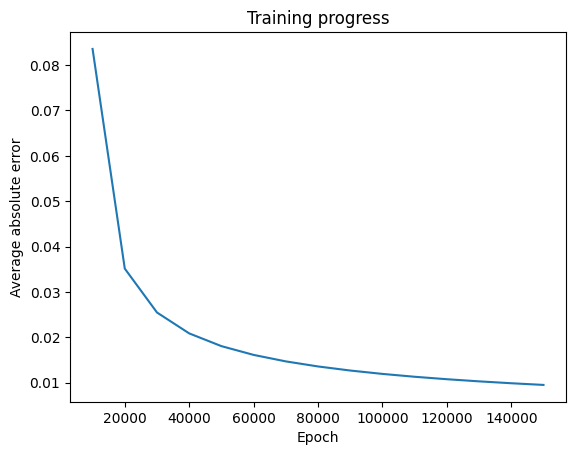

In [4]:
# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1                        # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))                    # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2                      # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))                    # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2                                # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))                 # Derivative for output layer
    dz2 = da2                                     # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)                       # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))                   # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)                  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True) # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)                   # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True) # Update bias for hidden layer

    if (epoch+1) % 10000 == 0:
        print("Epoch: %d, Average error: %0.05f" % (epoch+1, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

# (Optional) plot the error curve
plt.plot(np.arange(len(error_list)) * 10000 + 10000, error_list)
plt.xlabel('Epoch')
plt.ylabel('Average absolute error')
plt.title('Training progress')
plt.show()


In [5]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


Final output after training: [[0.01064116 0.99092211 0.99092208 0.00927483]]
Ground truth [[0 1 1 0]]
Error after training: [[-0.01064119  0.00907792  0.00907795 -0.00927486]]
Average error: 0.00952
